In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\Soft\Desktop\Py\Docs\Salary Data\Salary_dataset.csv")

In [3]:
df.head(10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


## 1) Load the data
## 2) Check the data if it is clean, if not then clean it.

### Dropping unwanted columns / features

In [4]:
df.drop(columns="Unnamed: 0", inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


<Axes: >

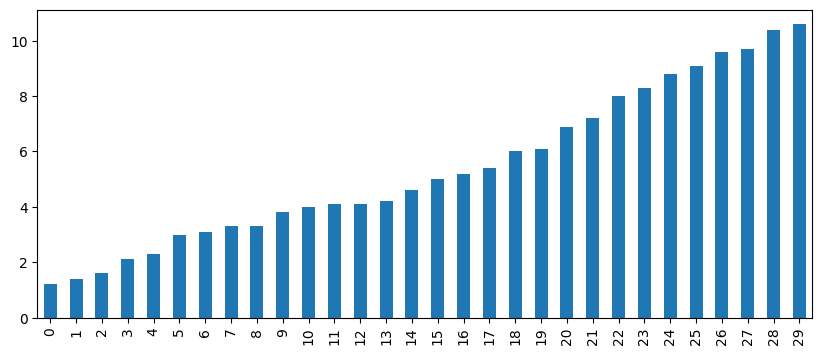

In [7]:
df["YearsExperience"].plot.bar(figsize=(10,4))

<Axes: >

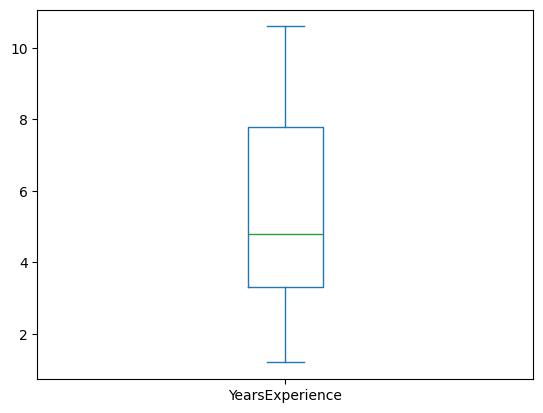

In [8]:
df["YearsExperience"].plot.box()

<Axes: >

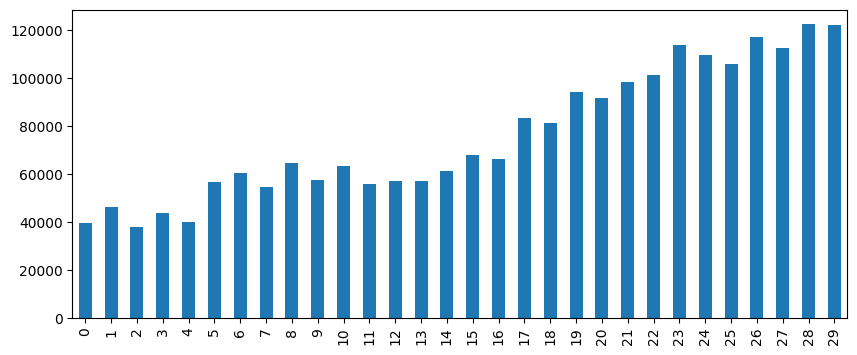

In [9]:
df["Salary"].plot.bar(figsize=(10,4))

<Axes: >

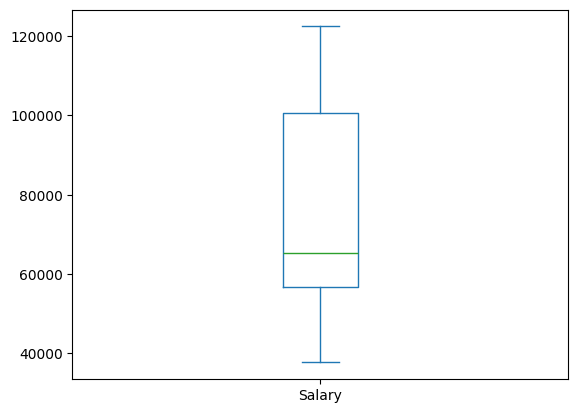

In [10]:
df["Salary"].plot.box()

## 3) Visualize the data to find some outliers or if the data is normal
## 4) For Visualization we can use -> Matplotlib, Seaborn or default plots from Pandas

<Axes: xlabel='YearsExperience', ylabel='Salary'>

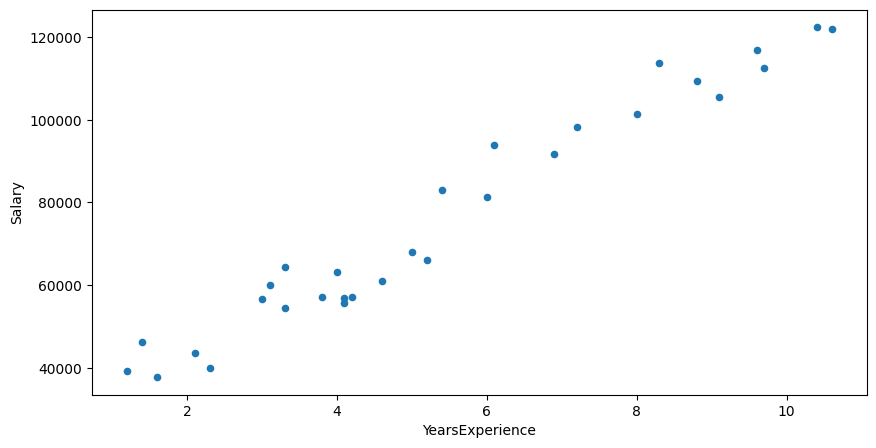

In [11]:
df.plot.scatter("YearsExperience", "Salary", figsize=(10, 5))

## 5) Data Splitting - We have to split or data into training set and testing set to evaluate or machine learning model. 
## 6) Majority of data will be used for training and rest of data is used to test.
## 7) from sklearn the train_test_split method can be used to do splitting

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop("Salary", axis=1) # Input Column
y = df["Salary"] # Output Column

In [14]:
X.head()

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3


In [15]:
y.head()

0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64

In [16]:
type(X)

pandas.core.frame.DataFrame

In [17]:
type(y)

pandas.core.series.Series

In [18]:
np.array(X)

array([[ 1.2],
       [ 1.4],
       [ 1.6],
       [ 2.1],
       [ 2.3],
       [ 3. ],
       [ 3.1],
       [ 3.3],
       [ 3.3],
       [ 3.8],
       [ 4. ],
       [ 4.1],
       [ 4.1],
       [ 4.2],
       [ 4.6],
       [ 5. ],
       [ 5.2],
       [ 5.4],
       [ 6. ],
       [ 6.1],
       [ 6.9],
       [ 7.2],
       [ 8. ],
       [ 8.3],
       [ 8.8],
       [ 9.1],
       [ 9.6],
       [ 9.7],
       [10.4],
       [10.6]])

In [19]:
np.array(y)

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

## Every sklearn model need 2D data as input columns to fit the model
## Output column can be a series or 1D data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=98)

In [21]:
X_train

,YearsExperience
15,5.0
22,8.0
24,8.8
23,8.3
11,4.1
3,2.1
17,5.4
28,10.4
19,6.1
18,6.0


In [22]:
y_train

15     67939.0
22    101303.0
24    109432.0
23    113813.0
11     55795.0
3      43526.0
17     83089.0
28    122392.0
19     93941.0
18     81364.0
21     98274.0
27    112636.0
2      37732.0
9      57190.0
6      60151.0
7      54446.0
4      39892.0
1      46206.0
25    105583.0
20     91739.0
10     63219.0
26    116970.0
Name: Salary, dtype: float64

In [23]:
X_test

,YearsExperience
5,3.0
13,4.2
0,1.2
8,3.3
14,4.6
12,4.1
16,5.2
29,10.6


In [24]:
y_test

5      56643.0
13     57082.0
0      39344.0
8      64446.0
14     61112.0
12     56958.0
16     66030.0
29    121873.0
Name: Salary, dtype: float64

## 8) Model Building - Can build the model using training data (X_train, y_train)

In [25]:
model = LinearRegression() # Creating the object of Linear Regression Class

In [26]:
model.fit(X_train, y_train)  # Fit method is used to train any model in sklearn
# X_train -> Training inputs
# y_train -> Training output

LinearRegression()

## 9) Model Evaluation using different techniques
## Regression -> R2 Score and Adjusted R2 Score (Multiple Linear Regression)
## Classification -> Accuracy score, Precision, Recall, F1 Score, Confusion Matrix, ROC-AUC

In [27]:
y_pred = model.predict(X_test)

In [28]:
model.predict([[5.8]])

array([80457.4110476])

In [29]:
y_pred

array([ 53595.32495307,  65107.64756501,  36326.84103516,  56473.40560606,
        68945.08843566,  64148.28734735,  74701.24974163, 126506.70149537])

## Checking r2_score for model accuracy

In [30]:
r2_score(y_test, y_pred)

0.9132547320185616

In [31]:
y_test

5      56643.0
13     57082.0
0      39344.0
8      64446.0
14     61112.0
12     56958.0
16     66030.0
29    121873.0
Name: Salary, dtype: float64

In [32]:
MSE = np.sum(np.square(y_test - y_pred))/len(y_test)
MSE

44510514.9784068

In [33]:
from statsmodels.tools.eval_measures import mse

In [34]:
mse(y_test, y_pred)

44510514.9784068

## 10) a) Model Saving and Retriving - Using Joblib

In [35]:
import joblib

In [36]:
joblib.dump(model, "Linear_Regression.joblib")   # Saving model in file

['Linear_Regression.joblib']

In [37]:
m = joblib.load("Linear_Regression.joblib")   # Retriving the model

In [38]:
m.predict([[6.5]])

array([87172.93257124])

## 10) b) Model Saving and Retriving - Using Pickle

In [39]:
import pickle as pkl

In [40]:
with open("Linear_Regression", "wb") as file:
    pkl.dump(model, file)

In [41]:
with open("Linear_Regression", "rb") as file:
    pk = pkl.load(file)

In [42]:
pk.predict([[2.4]])

array([47839.1636471])